In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv('Marketingcampaigns.csv')
df

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0
5,6,30,0,Sydney,0,0,0,0,0
6,7,28,1,Sydney,0,0,3,1,1
7,8,19,1,Sydney,1,1,2,0,0
8,9,59,0,Perth,1,1,1,0,0
9,10,45,1,Auckland,0,0,0,0,0


In [91]:
df.head()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
0,1,22,0,Perth,1,1,3,1,1
1,2,55,0,Auckland,1,0,0,0,0
2,3,15,1,Sydney,0,1,2,1,1
3,4,25,0,Brisbane,1,1,5,1,0
4,5,36,1,Brisbane,0,1,1,1,0


In [92]:
df.tail()

,Customer id,Age,Gender,Location,Email Opened,Email Clicked,Product page visit,Discount offered,Purchased
15,16,60,1,Sydney,1,0,0,0,0
16,17,53,1,Sydney,1,1,1,0,1
17,18,23,0,Perth,1,0,1,0,1
18,19,62,1,Perth,0,1,2,1,1
19,20,41,0,Brisbane,0,1,5,1,0


In [93]:
df.drop_duplicates(inplace = True)

In [94]:
df.dropna(inplace = True)

In [95]:
df.isnull().sum()

Customer id           0
Age                   0
Gender                0
Location              0
Email Opened          0
Email Clicked         0
Product page visit    0
Discount offered      0
Purchased             0
dtype: int64

In [96]:
df.shape

(20, 9)

In [97]:
df['Purchased'].value_counts()

Purchased
1    10
0    10
Name: count, dtype: int64

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Location'] = le.fit_transform(df['Location'])


In [99]:
X = df.drop(columns= 'Purchased')
Y = df['Purchased']


In [100]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [101]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(X, Y , test_size=0.2, random_state=2)
print(Xtrain.shape)
print(Xtest.shape)
print(Ytrain.shape)
print(Ytest.shape)


(16, 8)
(4, 8)
(16,)
(4,)


In [102]:
lr.fit(Xtrain,Ytrain)

LogisticRegression()

In [103]:
y_pred = lr.predict(Xtest)
y_pred

array([1, 0, 1, 0], dtype=int64)

In [104]:
lr.predict([[16,60,1,3,1,0,0,0]])

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [105]:
lr.predict([[17,53,1,3,1,1,1,0]])

c:\Users\AL-HAMD\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

Shows if discounts increase purchases.


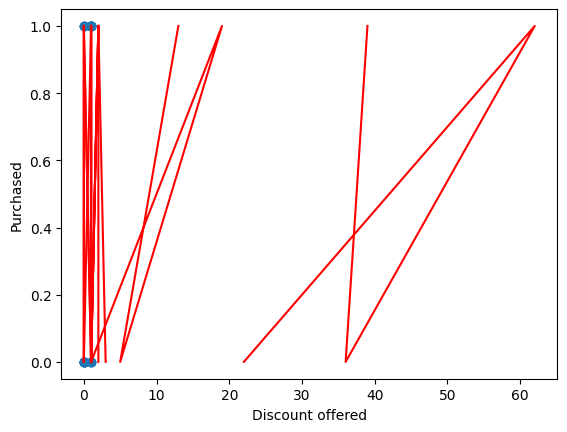

In [106]:
plt.scatter(df["Discount offered"], df["Purchased"])
plt.plot(Xtest, lr.predict(Xtest), color="Red")
plt.xlabel("Discount offered")
plt.ylabel("Purchased")
print("Shows if discounts increase purchases.")